Link of deplyed project: https://carbrandclassifier.herokuapp.com/

In [1]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
IMAGE_SIZE = [224, 224]
train_path = 'Datasets/Train'
test_path = 'Datasets/Test'

In [3]:
resnet = ResNet50(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

In [4]:
for layer in resnet.layers:
    layer.trainable = False

In [5]:
folders = glob(train_path + '/*')

In [6]:
folders

['Datasets/Train\\audi',
 'Datasets/Train\\lamborghini',
 'Datasets/Train\\mercedes']

In [7]:
x = Flatten()(resnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

In [9]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
training_set = train_datagen.flow_from_directory(train_path,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 64 images belonging to 3 classes.


In [13]:
testing_set = test_datagen.flow_from_directory(test_path,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 58 images belonging to 3 classes.


In [14]:
r = model.fit_generator(
    training_set,
    validation_data=testing_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(testing_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 4s 2s/step - loss: 4.0892 - accuracy: 0.3438 - val_loss: 16.2033 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 3s 2s/step - loss: 9.6266 - accuracy: 0.3281 - val_loss: 3.2168 - val_accuracy: 0.1724
Epoch 3/50
2/2 [==============================] - 3s 2s/step - loss: 3.0915 - accuracy: 0.3750 - val_loss: 3.0361 - val_accuracy: 0.5517
Epoch 4/50
2/2 [==============================] - 3s 2s/step - loss: 5.8132 - accuracy: 0.4531 - val_loss: 3.5017 - val_accuracy: 0.4655
Epoch 5/50
2/2 [==============================] - 4s 2s/step - loss: 5.8425 - accuracy: 0.4219 - val_loss: 2.4255 - val_accuracy: 0.5517
Epoch 6/50
2/2 [==============================] - 4s 2s/step - loss: 3.1468 - accuracy: 0.4062 - val_loss: 1.5630 - val_accuracy: 0.2759
Epoch 7/50
2/2 [==============================] - 4s 2s/step - loss: 1.8014 - accuracy: 0.4844 - val_

In [15]:
r.history

{'loss': [4.089186668395996,
  9.626638412475586,
  3.09151029586792,
  5.813173294067383,
  5.842452049255371,
  3.146806240081787,
  1.8014291524887085,
  2.859877824783325,
  2.08121919631958,
  2.4895172119140625,
  1.4225207567214966,
  1.625930905342102,
  1.74094557762146,
  0.7762298583984375,
  1.2015953063964844,
  0.6341086626052856,
  0.9005069732666016,
  0.44645607471466064,
  0.6100624799728394,
  0.3993246853351593,
  0.5726604461669922,
  0.46830642223358154,
  0.45015811920166016,
  0.3983139395713806,
  0.41550400853157043,
  0.45518434047698975,
  0.32858890295028687,
  0.32115644216537476,
  0.2797100841999054,
  0.2795485258102417,
  0.3300705850124359,
  0.26214632391929626,
  0.2824767231941223,
  0.2967461347579956,
  0.2519966959953308,
  0.2554883360862732,
  0.2639131546020508,
  0.29489028453826904,
  0.27191126346588135,
  0.24966469407081604,
  0.23448550701141357,
  0.262775719165802,
  0.2540295124053955,
  0.25267869234085083,
  0.23456773161888123,
  

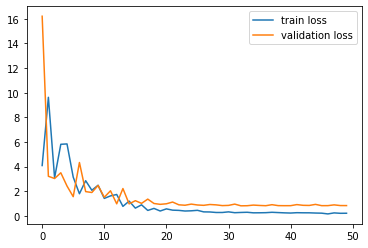

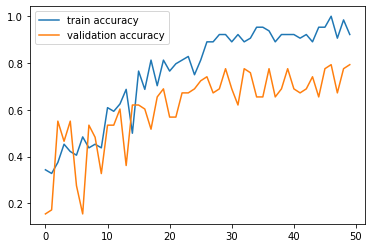

In [16]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_Loss')
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()
# plt.savefig('AccVal_Acc')

In [17]:
model.save('carModel_resnet50.h5')

In [18]:
y_pred = model.predict(testing_set)
y_pred

array([[1.46874622e-01, 6.73658967e-01, 1.79466426e-01],
       [7.48025328e-02, 8.09395850e-01, 1.15801588e-01],
       [5.13457954e-02, 6.90965168e-03, 9.41744626e-01],
       [3.63909811e-01, 1.27955586e-01, 5.08134604e-01],
       [4.27995697e-02, 5.67636549e-01, 3.89563918e-01],
       [4.41632513e-03, 9.51835811e-01, 4.37479429e-02],
       [1.08747033e-03, 9.96161819e-01, 2.75067822e-03],
       [1.03250034e-01, 5.86102664e-01, 3.10647309e-01],
       [5.26660541e-03, 6.21000051e-01, 3.73733312e-01],
       [5.68795145e-01, 3.77457321e-01, 5.37475161e-02],
       [2.71468330e-02, 7.80005336e-01, 1.92847818e-01],
       [1.33220032e-01, 8.38109076e-01, 2.86709275e-02],
       [7.51525071e-03, 9.79505420e-01, 1.29792159e-02],
       [2.78497394e-03, 9.87813473e-01, 9.40151978e-03],
       [5.75570762e-03, 4.47217189e-02, 9.49522495e-01],
       [5.89590985e-03, 9.58699822e-01, 3.54043022e-02],
       [1.45851091e-01, 3.70113045e-01, 4.84035939e-01],
       [3.39976512e-02, 4.24989

In [19]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1,
       1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1], dtype=int64)

In [20]:
from tensorflow.keras.models import load_model

model = load_model('carModel_resnet50.h5')

In [21]:
for i in range(27,46):
    img = load_img('Datasets/Test/mercedes/' + str(i) + '.jpg', target_size=(224,224))
    x = image.img_to_array(img)
    x/=255
    x = np.expand_dims(x, axis=0)
    print(np.argmax(model.predict(x), axis=1))

[2]
[2]
[2]
[2]
[2]
[2]
[1]
[2]
[0]
[2]
[0]
[1]
[1]
[2]
[2]
[2]
[2]
[2]
[2]


In [22]:
for i in range(21,30):
    img = load_img('Datasets/Test/audi/' + str(i) + '.jpg', target_size=(224,224))
    x = image.img_to_array(img)
    x/=255
    x = np.expand_dims(x, axis=0)
    print(np.argmax(model.predict(x), axis=1))

[1]
[0]
[1]
[1]
[0]
[2]
[1]
[0]
[0]


In [23]:
for i in range(1,31):
    img = load_img('Datasets/Test/lamborghini/' + str(i) + '.jpg', target_size=(224,224))
    x = image.img_to_array(img)
    x/=255
    x = np.expand_dims(x, axis=0)
    print(np.argmax(model.predict(x), axis=1))

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
